In [2]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [3]:
data_cv = pd.read_csv('inputs/real_estate_model_cv.csv')
data_cv.head()

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,...,amenities like,boasts elegant,elegant towers,great community,mantra gold,offering bedroom,quality specification,stories offering,towers stories,world class
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located suburbs ba...,1,1,...,0,0,0,0,0,0,0,0,0,0
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near lonavala hill ran...,1,1,...,0,0,0,0,0,0,0,0,0,0
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society suitable aged group people play...,1,1,...,0,0,0,0,0,0,0,0,0,0
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township offering bhk grand prpoerties ...,1,1,...,0,0,0,0,0,0,0,0,0,0
4,pune,maharashtra,india,2.0,mahalunge,godrej properties,godrej hills retreat,area hub prestigious schools like bishop high ...,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_cv.columns = [col.upper() for col in data_cv.columns.tolist()]

In [8]:
# Selecting only numerical features
cols_to_drop = ['CITY','STATE','COUNTRY','SUB-AREA CLEAN','TOWNSHIP NAME/ SOCIETY NAME CLEAN',
                'DESCRIPTION CLEAN','COMPANY NAME CLEAN', 'LOG PRICE IN LAKHS CLEAN']

features = data_cv.drop(cols_to_drop,axis=1).columns.tolist()
print("Final number of features: "+str(len(features)))

Final number of features: 32


In [9]:
print(features)

['PROPERTY TYPE CLEAN', 'CLUBHOUSE CLEAN', 'SCHOOL / UNIVERSITY IN TOWNSHIP CLEAN', 'HOSPITAL IN TOWNSHIP CLEAN', 'MALL IN TOWNSHIP CLEAN', 'PARK / JOGGING TRACK CLEAN', 'SWIMMING POOL CLEAN', 'GYM CLEAN', 'PROPERTY AREA IN SQ. FT. CLEAN', 'PRICE IN LAKHS CLEAN', 'PRICE BY SUB-AREA', 'PRICE BY COMPANY', 'PRICE BY TOWNSHIP_SOCIETY', 'AMENITIES SCORE', 'PRICE BY AMENITIES SCORE', 'NOUN_COUNTS', 'VERB_COUNTS', 'ADJECTIVE_COUNTS', 'COMPOUND', 'NEGATIVE', 'POSITIVE', 'NEUTRAL', 'AMENITIES LIKE', 'BOASTS ELEGANT', 'ELEGANT TOWERS', 'GREAT COMMUNITY', 'MANTRA GOLD', 'OFFERING BEDROOM', 'QUALITY SPECIFICATION', 'STORIES OFFERING', 'TOWERS STORIES', 'WORLD CLASS']


In [10]:
featuresMod = ['PROPERTYTYPE', 'CLUBHOUSE', 'SCHOOL_UNIVERSITY_IN_TOWNSHIP', 'HOSPITAL_IN_TOWNSHIP', 'MALL_IN_TOWNSHIP', 
               'PARK_JOGGING_TRACK', 'SWIMMING_POOL', 'GYM', 'PROPERTY_AREA_IN_SQ_FT', 'PRICE_IN_LAKHS', 'PRICE_BY_SUB_AREA',
               'PRICE_BY_COMPANY', 'PRICE_BY_TOWNSHIP_SOCIETY', 'AMENITIES_SCORE', 'PRICE_BY_AMENITIES_SCORE', 'NOUN_COUNTS',
               'VERB_COUNTS', 'ADJECTIVE_COUNTS', 'COMPOUND', 'NEGATIVE', 'POSITIVE', 'NEUTRAL', 'AMENITIES_LIKE', 'BOASTS_ELEGANT',
               'ELEGANT_TOWERS', 'GREAT COMMUNITY', 'MANTRA_GOLD', 'OFFERING_BEDROOM', 'QUALITY_SPECIFICATION', 'STORIES_OFFERING',
               'TOWERS_STORIES', 'WORLD_CLASS']
print(len(featuresMod))

32


In [11]:
df_features = data_cv[features]
df_features.columns = featuresMod
print(df_features.shape)
df_features.head()

(200, 32)


,PROPERTYTYPE,CLUBHOUSE,SCHOOL_UNIVERSITY_IN_TOWNSHIP,HOSPITAL_IN_TOWNSHIP,MALL_IN_TOWNSHIP,PARK_JOGGING_TRACK,SWIMMING_POOL,GYM,PROPERTY_AREA_IN_SQ_FT,PRICE_IN_LAKHS,...,AMENITIES_LIKE,BOASTS_ELEGANT,ELEGANT_TOWERS,GREAT COMMUNITY,MANTRA_GOLD,OFFERING_BEDROOM,QUALITY_SPECIFICATION,STORIES_OFFERING,TOWERS_STORIES,WORLD_CLASS
0,1.0,1,1,1,1,1,1,1,492.0,39.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1,1,1,1,1,1,1,774.0,65.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1,1,1,1,1,1,1,889.0,74.0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1,1,1,1,1,1,1,1018.0,89.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1,1,1,1,1,1,1,743.0,74.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_features = df_features.dropna()

In [14]:
s = setup(df_features, target='PRICE_IN_LAKHS', session_id=12)

,Description,Value
0,Session id,12
1,Target,PRICE_IN_LAKHS
2,Target type,Regression
3,Original data shape,"(199, 32)"
4,Transformed data shape,"(199, 32)"
5,Transformed train set shape,"(139, 32)"
6,Transformed test set shape,"(60, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [15]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.0065,144.9042,11.5914,0.9177,0.1449,0.1132,0.0990
rf,Random Forest Regressor,9.1525,187.8758,12.8603,0.8924,0.1536,0.1241,0.1340
gbr,Gradient Boosting Regressor,9.8458,215.4379,13.9307,0.8754,0.1543,0.1264,0.0430
ada,AdaBoost Regressor,11.2796,246.9268,14.7567,0.8579,0.1875,0.1645,0.0120
omp,Orthogonal Matching Pursuit,9.8350,281.0129,15.2583,0.8498,0.2172,0.1284,0.0080
knn,K Neighbors Regressor,10.8055,284.6733,15.5097,0.8484,0.1908,0.1500,0.0100
br,Bayesian Ridge,10.0181,285.1632,15.4201,0.8454,0.2438,0.1370,0.0080
en,Elastic Net,10.3075,289.2965,15.6922,0.8422,0.2193,0.1408,0.0110
ridge,Ridge Regression,10.5752,287.5538,15.9277,0.8420,0.2233,0.1467,0.0080
llar,Lasso Least Angle Regression,10.4377,292.7608,15.8153,0.8403,0.2267,0.1425,0.0110


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [17]:
model_1 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.9780,197.0415,14.0371,0.9140,0.1732,0.1178
1,7.1394,107.3811,10.3625,0.9492,0.1217,0.0987
2,12.8699,281.8789,16.7892,0.8776,0.1831,0.1614
3,8.3922,220.1864,14.8387,0.7978,0.1585,0.1265
4,4.4401,37.9633,6.1614,0.9753,0.0988,0.0730
5,9.2340,137.1207,11.7099,0.9222,0.2153,0.1719
6,8.6839,151.0923,12.2920,0.9353,0.1328,0.1110
7,7.0411,163.6152,12.7912,0.9200,0.0962,0.0713
8,7.5211,113.1336,10.6364,0.9178,0.1783,0.1323


In [18]:
tuned_model = tune_model(model_1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.2075,221.1085,14.8697,0.9035,0.2217,0.1519
1,7.1472,112.5078,10.6070,0.9467,0.1337,0.1069
2,17.9878,743.9358,27.2752,0.6771,0.3444,0.2822
3,10.7721,279.8177,16.7278,0.7430,0.2850,0.2291
4,5.7288,48.1254,6.9372,0.9687,0.1140,0.0927
5,9.8870,195.1733,13.9704,0.8893,0.2502,0.1870
6,10.1643,166.5425,12.9051,0.9286,0.1654,0.1407
7,11.2260,570.9394,23.8943,0.7209,0.1878,0.1076
8,8.9155,157.1795,12.5371,0.8857,0.1780,0.1428


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


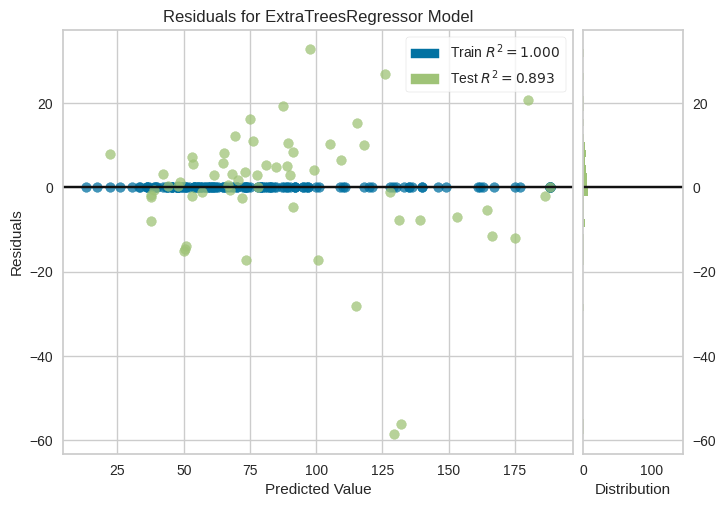

In [19]:
plot_model(tuned_model)

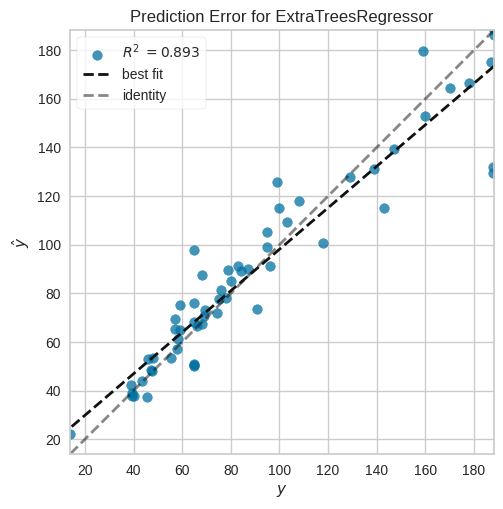

In [20]:
plot_model(tuned_model, plot = 'error')

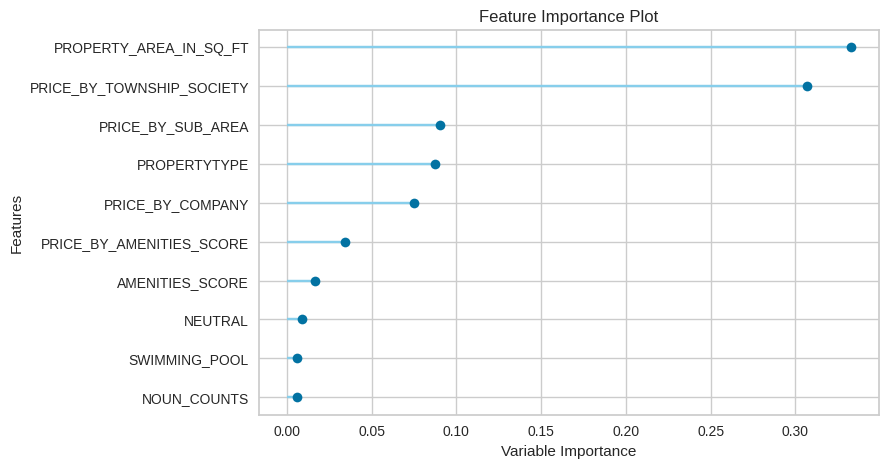

In [21]:
plot_model(tuned_model, plot='feature')

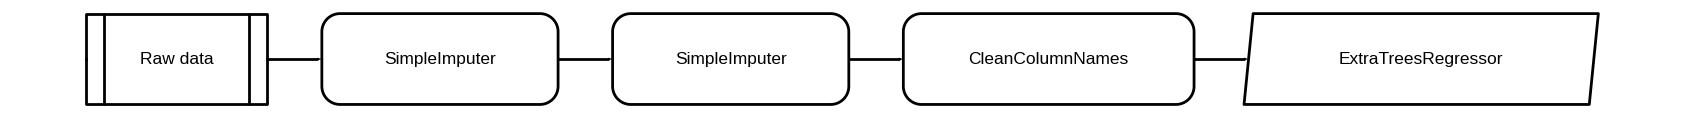

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
evaluate_model(tuned_model)

In [23]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,9.6056,222.9123,14.9302,0.8933,0.1514,0.1132


,PROPERTYTYPE,CLUBHOUSE,SCHOOL_UNIVERSITY_IN_TOWNSHIP,HOSPITAL_IN_TOWNSHIP,MALL_IN_TOWNSHIP,PARK_JOGGING_TRACK,SWIMMING_POOL,GYM,PROPERTY_AREA_IN_SQ_FT,PRICE_BY_SUB_AREA,...,ELEGANT_TOWERS,GREAT COMMUNITY,MANTRA_GOLD,OFFERING_BEDROOM,QUALITY_SPECIFICATION,STORIES_OFFERING,TOWERS_STORIES,WORLD_CLASS,PRICE_IN_LAKHS,prediction_label
149,2.0,1,0,0,0,1,1,1,606.000000,55.239998,...,0,0,0,0,0,0,0,0,47.250000,48.619800
11,5.0,1,0,0,0,1,1,1,1671.040039,86.583336,...,0,0,0,0,0,0,0,0,188.000000,129.422300
93,3.0,1,0,0,0,1,1,1,1315.000000,145.057495,...,0,0,0,0,0,0,0,0,170.000000,164.618400
125,2.0,1,0,0,0,1,1,1,792.000000,87.526665,...,0,0,0,0,0,0,0,0,78.000000,78.029601
94,3.0,1,0,0,0,1,1,1,1388.000000,145.057495,...,0,0,0,0,0,0,0,0,178.000000,166.381299
21,3.0,1,0,0,0,1,1,1,1030.000000,86.583336,...,0,0,0,0,0,0,0,0,79.000000,89.481799
199,2.0,1,0,0,0,1,1,1,776.000000,132.447495,...,0,0,0,0,0,0,0,0,90.680000,73.587700
63,2.5,1,0,0,0,1,1,0,847.000000,69.665001,...,0,0,0,0,0,0,0,0,69.379997,73.085100
7,3.0,1,0,0,0,1,1,1,1174.500000,83.750000,...,1,1,0,1,1,1,1,0,100.000000,115.238300
29,3.0,1,0,0,0,1,0,1,934.000000,66.310623,...,0,0,1,0,0,0,0,0,65.000000,76.032900


In [24]:
final_model = finalize_model(tuned_model)
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['PROPERTYTYPE', 'CLUBHOUSE',
                                             'SCHOOL_UNIVERSITY_IN_TOWNSHIP',
                                             'HOSPITAL_IN_TOWNSHIP',
                                             'MALL_IN_TOWNSHIP',
                                             'PARK_JOGGING_TRACK',
                                             'SWIMMING_POOL', 'GYM',
                                             'PROPERTY_AREA_IN_SQ_FT',
                                             'PRICE_BY_SUB_AREA',
                                             'PRICE_BY_COMPANY',
                                             'PRICE_BY_TOWNSHIP_SOCIETY',
                                             'AMENITIES_SCORE',
                                             'P...
                                             'OFFERING_BEDROOM',
                                             